In [2]:
!pip install dowhy

  Using cached dowhy-0.6-py3-none-any.whl (123 kB)
  Using cached decorator-4.4.2-py2.py3-none-any.whl (9.2 kB)
  Attempting uninstall: decorator
    Found existing installation: decorator 5.0.9
    Uninstalling decorator-5.0.9:
      Successfully uninstalled decorator-5.0.9


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dvc 2.5.4 requires flufl.lock<4,>=3.2, but you have flufl-lock 5.1 which is incompatible.
dvc 2.5.4 requires ruamel.yaml>=0.16.1, but you have ruamel-yaml 0.15.87 which is incompatible.


In [4]:
from dowhy import CausalModel
import dowhy.datasets

In [5]:
# Load some sample data
data = dowhy.datasets.linear_dataset(
    beta=10,
    num_common_causes=5,
    num_instruments=2,
    num_samples=10000,
    treatment_is_binary=True)

In [11]:
data

{'df':        Z0        Z1        W0        W1        W2        W3        W4     v0  \
 0     1.0  0.976250 -0.190243 -0.210336  0.404128 -1.492176 -0.913500   True   
 1     1.0  0.821940  1.449783 -1.244749  1.349498  1.205028 -0.351199   True   
 2     0.0  0.886512  0.506867 -1.698287  1.582182  1.311806 -0.599291   True   
 3     1.0  0.814476  0.625219 -1.482793  2.028301 -1.728053 -2.234636   True   
 4     0.0  0.984135  1.665532 -1.300079 -0.851670  0.231970 -0.957373   True   
 ...   ...       ...       ...       ...       ...       ...       ...    ...   
 9995  0.0  0.420429  1.592145 -0.470586 -0.465929  1.777985 -1.933273   True   
 9996  0.0  0.929422  0.990914 -0.192458  1.333913 -0.343817  1.158131   True   
 9997  0.0  0.486238  0.449783  0.108229 -1.356496  0.448385 -0.344960  False   
 9998  1.0  0.362370  0.273964  1.607635 -0.748257 -0.860998 -0.852290   True   
 9999  0.0  0.564669  0.652808 -0.028944  1.804492  1.619093  0.630937   True   
 
               y  pr

<AxesSubplot:xlabel='v0'>

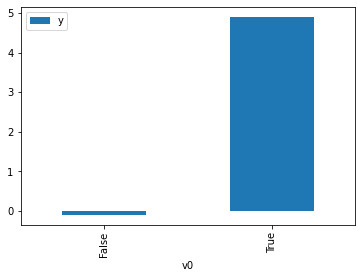

In [12]:
import dowhy.api
import dowhy.datasets

data = dowhy.datasets.linear_dataset(beta=5,
    num_common_causes=1,
    num_instruments = 0,
    num_samples=1000,
    treatment_is_binary=True)

# data['df'] is just a regular pandas.DataFrame
data['df'].causal.do(x='v0', # name of treatment variable
                     variable_types={'v0': 'b', 'y': 'c', 'W0': 'c'},
                     outcome='y',
                     common_causes=['W0']).groupby('v0').mean().plot(y='y', kind='bar')
